In [1]:
# Word2Vec - DRAFT
# The purpose of this exemple is to map words to vectors
# this code is a DRAFT

In [114]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import math
import scipy
import sklearn
from tensorflow.keras import layers, models, optimizers
from tensorflow import train

In [115]:
contents = open("data/The Burgess Animal Book for Children.txt", "r", encoding='utf-8').read()

In [120]:
sentences = contents.lower().replace("\r\n", " ").replace("\r", " ").replace("\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("“", ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').replace("-", ' ').replace("”", ' ').split(".")

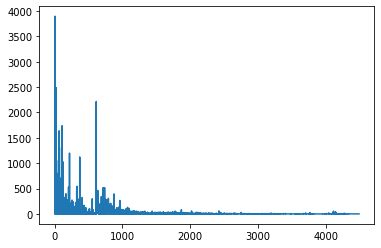

1334


In [121]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1
            
plt.plot(list(tmp_dictionary.values()))
plt.show()
            
# keep only frequent words occurences
mean = np.mean(list(tmp_dictionary.values()))
stdev = np.std(list(tmp_dictionary.values()))

for word in tmp_dictionary:
    if tmp_dictionary[word] > 5 and not word.isnumeric():
        dictionary.append(word)
        
print(len(dictionary))

0 - ﻿the project gutenberg ebook of the burgess animal book for children  by thornton w
    - project: X_X_XXX_gutenberg_X
    - gutenberg: X_project_XXX_ebook_X
    - ebook: X_gutenberg_XXX_of_X
    - of: X_ebook_XXX_the_X
    - the: X_of_XXX_burgess_X
    - burgess: X_the_XXX_animal_X
    - animal: X_burgess_XXX_book_X
    - book: X_animal_XXX_for_X
    - for: X_book_XXX_children_X
    - children: X_for_XXX__X
    - by: X_children_XXX_thornton_X
    - w: X_by_XXX_X_X
1 -  burgess  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever
    - burgess: X_X_XXX__X
    - this: X_burgess_XXX_ebook_X
    - ebook: X_this_XXX_is_X
    - is: X_ebook_XXX_for_X
    - for: X_is_XXX_the_X
    - the: X_for_XXX_use_X
    - use: X_the_XXX_of_X
    - of: X_use_XXX_anyone_X
    - anyone: X_of_XXX_anywhere_X
    - anywhere: X_anyone_XXX_at_X
    - at: X_anywhere_XXX_no_X
    - no: X_at_XXX_cost_X
    - and: X_no_XXX_with_X
    - with: X_and_XXX_almost_X
    - 

    - lightfoot: X_X_XXX__X
    - blacktail: X_lightfoot_XXX_and_X
    - and: X_blacktail_XXX_forkhorn_X
    - forkhorn: X_and_XXX__X
    - the: X_forkhorn_XXX_white_X
    - white: X_the_XXX_tailed_X
    - tailed: X_white_XXX_or_X
    - or: X_tailed_XXX_virginia_X
    - deer: X_or_XXX__X
    - black: X_deer_XXX_tailed_X
    - tailed: X_black_XXX_deer_X
    - deer: X_tailed_XXX__X
    - and: X_deer_XXX_mule_X
    - mule: X_and_XXX_deer_X
    - deer: X_mule_XXX_X_X
72 -       xxxvi bugler  flathorns and wanderhoof           the elk or wapiti  moose or caribou
    - bugler: X_X_XXX__X
    - flathorns: X_bugler_XXX_and_X
    - and: X_flathorns_XXX_wanderhoof_X
    - wanderhoof: X_and_XXX__X
    - the: X_wanderhoof_XXX_elk_X
    - elk: X_the_XXX_or_X
    - or: X_elk_XXX_wapiti_X
    - or: X_or_XXX_caribou_X
    - caribou: X_or_XXX_X_X
73 -      xxxvii thunderfoot  fleetfoot and longcoat           the buffalo or bison  antelope or musk ox
    - thunderfoot: X_X_XXX__X
    - fleetfoot: X_thun

    - want: X_i_XXX_to_X
    - to: X_want_XXX_know_X
    - know: X_to_XXX_if_X
    - if: X_know_XXX_it_X
    - it: X_if_XXX_is_X
    - is: X_it_XXX_true_X
    - true: X_is_XXX_that_X
    - that: X_true_XXX_there_X
    - there: X_that_XXX_are_X
    - are: X_there_XXX_any_X
    - any: X_are_XXX_other_X
    - other: X_any_XXX_members_X
    - members: X_other_XXX_of_X
    - of: X_members_XXX_the_X
    - the: X_of_XXX_rabbit_X
    - rabbit: X_the_XXX_and_X
    - and: X_rabbit_XXX_the_X
    - the: X_and_XXX_hare_X
    - hare: X_the_XXX_family_X
    - family: X_hare_XXX_besides_X
    - my: X_family_XXX_big_X
    - big: X_my_XXX_cousin_X
    - cousin: X_big_XXX__X
    - jumper: X_cousin_XXX__X
    - who: X_jumper_XXX_lives_X
    - lives: X_who_XXX_here_X
    - here: X_lives_XXX_in_X
    - in: X_here_XXX_the_X
    - the: X_in_XXX_green_X
    - green: X_the_XXX_forest_X
    - forest: X_green_XXX__X
    - and: X_forest_XXX_myself_X
    - myself: X_and_XXX_X_X
153 -    old mother nature s eyes twi

    - i: X_where_XXX_can_X
    - can: X_i_XXX_dodge_X
    - around: X_can_XXX_trees_X
    - trees: X_around_XXX_and_X
    - and: X_trees_XXX_bushes_X
    - bushes: X_and_XXX_X_X
257 -   that is why i stick to the green forest
    - that: X_X_XXX_is_X
    - is: X_that_XXX_why_X
    - why: X_is_XXX_i_X
    - i: X_why_XXX_stick_X
    - stick: X_i_XXX_to_X
    - to: X_stick_XXX_the_X
    - the: X_to_XXX_green_X
    - green: X_the_XXX_forest_X
    - forest: X_green_XXX_X_X
258 -   if you please  mother nature  what is this about a cousin who likes to swim    old mother nature s eyes twinkled
    - if: X_X_XXX_you_X
    - you: X_if_XXX_please_X
    - please: X_you_XXX__X
    - mother: X_please_XXX_nature_X
    - nature: X_mother_XXX__X
    - what: X_nature_XXX_is_X
    - is: X_what_XXX_this_X
    - this: X_is_XXX_about_X
    - about: X_this_XXX_a_X
    - a: X_about_XXX_cousin_X
    - cousin: X_a_XXX_who_X
    - who: X_cousin_XXX_likes_X
    - likes: X_who_XXX_to_X
    - to: X_likes_XXX_swim_

    - is: X_who_XXX_still_X
    - still: X_is_XXX_bigger_X
    - bigger: X_still_XXX__X
    - the: X_bigger_XXX_biggest_X
    - biggest: X_the_XXX_of_X
    - of: X_biggest_XXX_all_X
    - all: X_of_XXX_the_X
    - the: X_all_XXX_family_X
    - family: X_the_XXX_X_X
363 -     who is he   jumper and peter cried together
    - who: X_X_XXX_is_X
    - is: X_who_XXX_he_X
    - he: X_is_XXX__X
    - jumper: X_he_XXX_and_X
    - and: X_jumper_XXX_peter_X
    - peter: X_and_XXX_cried_X
    - cried: X_peter_XXX_together_X
    - together: X_cried_XXX_X_X
364 -    he is called white tailed jack   replied old mother nature
    - he: X_X_XXX_is_X
    - is: X_he_XXX_called_X
    - called: X_is_XXX_white_X
    - white: X_called_XXX_tailed_X
    - tailed: X_white_XXX_jack_X
    - jack: X_tailed_XXX__X
    - replied: X_jack_XXX_old_X
    - old: X_replied_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_X_X
365 -    and he lives chiefly on the great plains of the northwest  thoug

    - m: X_i_XXX_going_X
    - going: X_m_XXX_to_X
    - to: X_going_XXX_school_X
    - school: X_to_XXX_to_X
    - to: X_school_XXX_old_X
    - old: X_to_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX__X
    - retorted: X_nature_XXX_peter_X
    - peter: X_retorted_XXX_X_X
474 -    i ve been going for several days  and so has my cousin  jumper the hare
    - i: X_X_XXX_ve_X
    - ve: X_i_XXX_been_X
    - been: X_ve_XXX_going_X
    - going: X_been_XXX_for_X
    - for: X_going_XXX_several_X
    - several: X_for_XXX_days_X
    - days: X_several_XXX__X
    - and: X_days_XXX_so_X
    - so: X_and_XXX_has_X
    - has: X_so_XXX_my_X
    - my: X_has_XXX_cousin_X
    - cousin: X_my_XXX__X
    - jumper: X_cousin_XXX_the_X
    - the: X_jumper_XXX_hare_X
    - hare: X_the_XXX_X_X
475 -  we ve learned a lot about our own family and now we are going to learn about the other little people of the green forest and the green meadows
    - we: X_X_XXX_ve_X
    - ve: X_we_XXX_lear

    - and: X_west_XXX_is_X
    - is: X_and_XXX_often_X
    - often: X_is_XXX_called_X
    - called: X_often_XXX_gopher_X
    - gopher: X_called_XXX_squirrel_X
    - squirrel: X_gopher_XXX__X
    - is: X_squirrel_XXX_the_X
    - the: X_is_XXX_true_X
    - true: X_the_XXX_ground_X
    - ground: X_true_XXX_squirrel_X
    - squirrel: X_ground_XXX_X_X
573 -   now i can t spend any more time with you little folks this morning  because i ve too much to do
    - now: X_X_XXX_i_X
    - i: X_now_XXX_can_X
    - can: X_i_XXX_t_X
    - t: X_can_XXX_spend_X
    - spend: X_t_XXX_any_X
    - any: X_spend_XXX_more_X
    - more: X_any_XXX_time_X
    - time: X_more_XXX_with_X
    - with: X_time_XXX_you_X
    - you: X_with_XXX_little_X
    - little: X_you_XXX_folks_X
    - folks: X_little_XXX_this_X
    - this: X_folks_XXX_morning_X
    - morning: X_this_XXX__X
    - because: X_morning_XXX_i_X
    - i: X_because_XXX_ve_X
    - ve: X_i_XXX_too_X
    - too: X_ve_XXX_much_X
    - much: X_too_XXX_to_X
    - 

    - sharp: X_very_XXX_X_X
663 -    you two cousins never have agreed and i am afraid never will
    - you: X_X_XXX_two_X
    - two: X_you_XXX_cousins_X
    - cousins: X_two_XXX_never_X
    - never: X_cousins_XXX_have_X
    - have: X_never_XXX_agreed_X
    - agreed: X_have_XXX_and_X
    - and: X_agreed_XXX_i_X
    - i: X_and_XXX_am_X
    - am: X_i_XXX_afraid_X
    - afraid: X_am_XXX_never_X
    - never: X_afraid_XXX_will_X
    - will: X_never_XXX_X_X
664 -  as long as you are neighbors  i suspect you will quarrel
    - as: X_X_XXX_long_X
    - long: X_as_XXX_as_X
    - as: X_long_XXX_you_X
    - you: X_as_XXX_are_X
    - are: X_you_XXX_neighbors_X
    - neighbors: X_are_XXX__X
    - i: X_neighbors_XXX_suspect_X
    - suspect: X_i_XXX_you_X
    - you: X_suspect_XXX_will_X
    - will: X_you_XXX_quarrel_X
665 -   have you told us all you know about happy jack  chatterer    chatterer nodded
    - have: X_X_XXX_you_X
    - you: X_have_XXX_told_X
    - told: X_you_XXX_us_X
    - us: X_told_

    - in: X_a_XXX_which_X
    - which: X_in_XXX_to_X
    - to: X_which_XXX_keep_X
    - keep: X_to_XXX_my_X
    - my: X_keep_XXX_supply_X
    - of: X_my_XXX_seeds_X
    - seeds: X_of_XXX_and_X
    - and: X_seeds_XXX_nuts_X
    - nuts: X_and_XXX_X_X
760 -  sometimes i have more than one storeroom
    - sometimes: X_X_XXX_i_X
    - i: X_sometimes_XXX_have_X
    - have: X_i_XXX_more_X
    - more: X_have_XXX_than_X
    - than: X_more_XXX_one_X
    - one: X_than_XXX_storeroom_X
761 -   also i have some little side tunnels
    - also: X_X_XXX_i_X
    - i: X_also_XXX_have_X
    - have: X_i_XXX_some_X
    - some: X_have_XXX_little_X
    - little: X_some_XXX_side_X
    - side: X_little_XXX_tunnels_X
    - tunnels: X_side_XXX_X_X
762 -     but why is it i never have been able to find the entrance to your tunnel   asked peter  as full of curiosity as ever
    - but: X_X_XXX_why_X
    - why: X_but_XXX_is_X
    - is: X_why_XXX_it_X
    - it: X_is_XXX_i_X
    - i: X_it_XXX_never_X
    - never: X_i_X

    - morning: X_next_XXX_johnny_X
    - johnny: X_morning_XXX_chuck_X
    - chuck: X_johnny_XXX_came_X
    - came: X_chuck_XXX_waddling_X
    - through: X_came_XXX_the_X
    - the: X_through_XXX_green_X
    - green: X_the_XXX_forest_X
    - forest: X_green_XXX_just_X
    - just: X_forest_XXX_as_X
    - as: X_just_XXX_old_X
    - old: X_as_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_was_X
    - was: X_nature_XXX_about_X
    - about: X_was_XXX_to_X
    - to: X_about_XXX_open_X
    - open: X_to_XXX_school_X
    - school: X_open_XXX_X_X
863 -  he didn t look at all happy  and he didn t reply at all to the greetings of the others
    - he: X_X_XXX_didn_X
    - didn: X_he_XXX_t_X
    - t: X_didn_XXX_look_X
    - look: X_t_XXX_at_X
    - at: X_look_XXX_all_X
    - all: X_at_XXX_happy_X
    - happy: X_all_XXX__X
    - and: X_happy_XXX_he_X
    - he: X_and_XXX_didn_X
    - didn: X_he_XXX_t_X
    - t: X_didn_XXX_reply_X
    - reply: X_t_XXX_at_X
    - at: X_reply_XX

    - keeps: X_it_XXX_me_X
    - me: X_keeps_XXX_warm_X
    - warm: X_me_XXX_and_X
    - and: X_warm_XXX_keeps_X
    - keeps: X_and_XXX_me_X
    - me: X_keeps_XXX_alive_X
    - alive: X_me_XXX_until_X
    - until: X_alive_XXX_i_X
    - i: X_until_XXX_can_X
    - can: X_i_XXX_find_X
    - find: X_can_XXX_the_X
    - the: X_find_XXX_first_X
    - first: X_the_XXX_green_X
    - green: X_first_XXX_plants_X
    - plants: X_green_XXX_X_X
962 -   perhaps you have noticed that early in the spring i am as thin as i was fat in the fall
    - perhaps: X_X_XXX_you_X
    - you: X_perhaps_XXX_have_X
    - have: X_you_XXX_noticed_X
    - noticed: X_have_XXX_that_X
    - that: X_noticed_XXX_early_X
    - early: X_that_XXX_in_X
    - in: X_early_XXX_the_X
    - the: X_in_XXX_spring_X
    - spring: X_the_XXX_i_X
    - i: X_spring_XXX_am_X
    - am: X_i_XXX_as_X
    - as: X_am_XXX_thin_X
    - thin: X_as_XXX_as_X
    - as: X_thin_XXX_i_X
    - i: X_as_XXX_was_X
    - was: X_i_XXX_fat_X
    - fat: X_was_X

    - little: X_lively_XXX_people_X
    - people: X_little_XXX_and_X
    - and: X_people_XXX_do_X
    - do: X_and_XXX_a_X
    - a: X_do_XXX_great_X
    - great: X_a_XXX_deal_X
    - deal: X_great_XXX_of_X
    - of: X_deal_XXX_talking_X
    - talking: X_of_XXX_among_X
    - among: X_talking_XXX_themselves_X
    - themselves: X_among_XXX_X_X
1050 -   the instant one of them sees an enemy he gives a signal
    - the: X_X_XXX_instant_X
    - instant: X_the_XXX_one_X
    - one: X_instant_XXX_of_X
    - of: X_one_XXX_them_X
    - them: X_of_XXX_sees_X
    - an: X_them_XXX_enemy_X
    - enemy: X_an_XXX_he_X
    - he: X_enemy_XXX_gives_X
    - gives: X_he_XXX_a_X
    - a: X_gives_XXX_signal_X
1051 -  then every prairie dog scampers for his own hole and dives in head first
    - then: X_X_XXX_every_X
    - every: X_then_XXX_prairie_X
    - prairie: X_every_XXX_dog_X
    - dog: X_prairie_XXX_scampers_X
    - for: X_dog_XXX_his_X
    - his: X_for_XXX_own_X
    - own: X_his_XXX_hole_X
    - hole: 

    - in: X_a_XXX_old_X
    - old: X_in_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_s_X
    - s: X_nature_XXX_eyes_X
    - eyes: X_s_XXX_as_X
    - as: X_eyes_XXX_she_X
    - she: X_as_XXX_replied_X
    - replied: X_she_XXX__X
    - he: X_replied_XXX_makes_X
    - makes: X_he_XXX_that_X
    - that: X_makes_XXX_hay_X
    - hay: X_that_XXX_just_X
    - just: X_hay_XXX_as_X
    - as: X_just_XXX_you_X
    - you: X_as_XXX_see_X
    - see: X_you_XXX_farmer_X
    - farmer: X_see_XXX_brown_X
    - brown: X_farmer_XXX_make_X
    - make: X_brown_XXX_hay_X
    - hay: X_make_XXX_every_X
    - every: X_hay_XXX_summer_X
    - summer: X_every_XXX_X_X
1134 -   it is what he lives on in the winter and in bad weather
    - it: X_X_XXX_is_X
    - is: X_it_XXX_what_X
    - what: X_is_XXX_he_X
    - he: X_what_XXX_lives_X
    - lives: X_he_XXX_on_X
    - on: X_lives_XXX_in_X
    - in: X_on_XXX_the_X
    - the: X_in_XXX_winter_X
    - winter: X_the_XXX_and_X
    - and: X_winter_

    - rather: X_was_XXX_peevish_X
1233 -    it wouldn t be my fault if you had a few of my little spears sticking in you this very minute  and it would serve you right
    - it: X_X_XXX_wouldn_X
    - wouldn: X_it_XXX_t_X
    - t: X_wouldn_XXX_be_X
    - be: X_t_XXX_my_X
    - my: X_be_XXX_fault_X
    - if: X_my_XXX_you_X
    - you: X_if_XXX_had_X
    - had: X_you_XXX_a_X
    - a: X_had_XXX_few_X
    - few: X_a_XXX_of_X
    - of: X_few_XXX_my_X
    - my: X_of_XXX_little_X
    - little: X_my_XXX_spears_X
    - spears: X_little_XXX_sticking_X
    - in: X_spears_XXX_you_X
    - you: X_in_XXX_this_X
    - this: X_you_XXX_very_X
    - very: X_this_XXX_minute_X
    - minute: X_very_XXX__X
    - and: X_minute_XXX_it_X
    - it: X_and_XXX_would_X
    - would: X_it_XXX_serve_X
    - you: X_would_XXX_right_X
    - right: X_you_XXX_X_X
1234 -    he waddled along a few steps  then began talking again
    - he: X_X_XXX_waddled_X
    - along: X_he_XXX_a_X
    - a: X_along_XXX_few_X
    - few: X_a_XX

    - s: X_grubby_XXX_tunnels_X
    - tunnels: X_s_XXX_go_X
    - go: X_tunnels_XXX_in_X
    - in: X_go_XXX_every_X
    - every: X_in_XXX_direction_X
    - direction: X_every_XXX_until_X
    - until: X_direction_XXX_the_X
    - the: X_until_XXX_ground_X
    - ground: X_the_XXX_is_X
    - is: X_ground_XXX_like_X
    - like: X_is_XXX_honeycomb_X
1323 -   he isn t a bit social and has rather a mean disposition
    - he: X_X_XXX_isn_X
    - isn: X_he_XXX_t_X
    - t: X_isn_XXX_a_X
    - a: X_t_XXX_bit_X
    - bit: X_a_XXX_social_X
    - social: X_bit_XXX_and_X
    - and: X_social_XXX_has_X
    - has: X_and_XXX_rather_X
    - rather: X_has_XXX_a_X
    - a: X_rather_XXX_mean_X
    - mean: X_a_XXX_disposition_X
1324 -   he is always ready to fight
    - he: X_X_XXX_is_X
    - is: X_he_XXX_always_X
    - always: X_is_XXX_ready_X
    - ready: X_always_XXX_to_X
    - to: X_ready_XXX_fight_X
    - fight: X_to_XXX_X_X
1325 -   on the plains he has done a great deal to make the soil fine and rich  

    - should: X_i_XXX_think_X
    - think: X_should_XXX_that_X
    - that: X_think_XXX_would_X
    - would: X_that_XXX_hurt_X
    - him: X_would_XXX__X
    - spoke: X_him_XXX_up_X
    - up: X_spoke_XXX_striped_X
    - striped: X_up_XXX_chipmunk_X
    - chipmunk: X_striped_XXX_X_X
1417 -    not at all   replied old mother nature
    - not: X_X_XXX_at_X
    - at: X_not_XXX_all_X
    - all: X_at_XXX__X
    - replied: X_all_XXX_old_X
    - old: X_replied_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_X_X
1418 -    they are very loosely fastened in his skin and come out at the least little pull
    - they: X_X_XXX_are_X
    - are: X_they_XXX_very_X
    - very: X_are_XXX_loosely_X
    - in: X_very_XXX_his_X
    - his: X_in_XXX_skin_X
    - skin: X_his_XXX_and_X
    - and: X_skin_XXX_come_X
    - come: X_and_XXX_out_X
    - out: X_come_XXX_at_X
    - at: X_out_XXX_the_X
    - the: X_at_XXX_least_X
    - least: X_the_XXX_little_X
    - little: X_least_XXX_pull_X
    -

    - on: X_there_XXX_his_X
    - his: X_on_XXX_dam_X
    - dam: X_his_XXX__X
    - he: X_dam_XXX_looked_X
    - looked: X_he_XXX_rather_X
    - rather: X_looked_XXX_like_X
    - like: X_rather_XXX_a_X
    - a: X_like_XXX_giant_X
    - member: X_a_XXX_of_X
    - of: X_member_XXX_the_X
    - the: X_of_XXX_rat_X
    - rat: X_the_XXX_family_X
    - family: X_rat_XXX__X
    - though: X_family_XXX_his_X
    - his: X_though_XXX_head_X
    - head: X_his_XXX_was_X
    - was: X_head_XXX_more_X
    - more: X_was_XXX_like_X
    - like: X_more_XXX_that_X
    - that: X_like_XXX_of_X
    - of: X_that_XXX_a_X
    - a: X_of_XXX_squirrel_X
    - squirrel: X_a_XXX_than_X
    - than: X_squirrel_XXX_a_X
    - a: X_than_XXX_rat_X
    - rat: X_a_XXX_X_X
1533 -   his body was very thick and heavy  and in color he was dark brown  lighter underneath than above
    - his: X_X_XXX_body_X
    - body: X_his_XXX_was_X
    - was: X_body_XXX_very_X
    - very: X_was_XXX_thick_X
    - thick: X_very_XXX_and_X
    - and

    - through: X_getting_XXX_X_X
1629 -   as the water backed up  of course it made a pond
    - as: X_X_XXX_the_X
    - the: X_as_XXX_water_X
    - water: X_the_XXX_backed_X
    - backed: X_water_XXX_up_X
    - up: X_backed_XXX__X
    - of: X_up_XXX_course_X
    - course: X_of_XXX_it_X
    - it: X_course_XXX_made_X
    - made: X_it_XXX_a_X
    - a: X_made_XXX_pond_X
    - pond: X_a_XXX_X_X
1630 -  i kept making my dam longer and higher  and the longer and higher it became the bigger the pond grew
    - i: X_X_XXX_kept_X
    - kept: X_i_XXX_making_X
    - making: X_kept_XXX_my_X
    - my: X_making_XXX_dam_X
    - dam: X_my_XXX_longer_X
    - longer: X_dam_XXX_and_X
    - and: X_longer_XXX_higher_X
    - and: X_and_XXX_the_X
    - the: X_and_XXX_longer_X
    - longer: X_the_XXX_and_X
    - and: X_longer_XXX_higher_X
    - it: X_and_XXX_became_X
    - became: X_it_XXX_the_X
    - the: X_became_XXX_bigger_X
    - bigger: X_the_XXX_the_X
    - the: X_bigger_XXX_pond_X
    - pond: X_the_XXX

    - now: X_and_XXX_he_X
    - he: X_now_XXX_is_X
    - is: X_he_XXX_found_X
    - found: X_is_XXX_everywhere_X
1730 -   he is sometimes called the norway rat and sometimes the wharf rat and house rat
    - he: X_X_XXX_is_X
    - is: X_he_XXX_sometimes_X
    - sometimes: X_is_XXX_called_X
    - called: X_sometimes_XXX_the_X
    - the: X_called_XXX_norway_X
    - rat: X_the_XXX_and_X
    - and: X_rat_XXX_sometimes_X
    - sometimes: X_and_XXX_the_X
    - the: X_sometimes_XXX_wharf_X
    - rat: X_the_XXX_and_X
    - and: X_rat_XXX_house_X
    - house: X_and_XXX_rat_X
    - rat: X_house_XXX_X_X
1731 -   he is hated by all animals and by man
    - he: X_X_XXX_is_X
    - is: X_he_XXX_hated_X
    - by: X_is_XXX_all_X
    - all: X_by_XXX_animals_X
    - animals: X_all_XXX_and_X
    - and: X_animals_XXX_by_X
    - by: X_and_XXX_man_X
    - man: X_by_XXX_X_X
1732 -   he is big  being next in size to jerry muskrat  savage in temper  the most destructive of any animal i know  and dirty in his ha

    - replied: X_very_XXX_old_X
    - old: X_replied_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_X_X
1824 -    it depends largely on where he is
    - it: X_X_XXX_depends_X
    - depends: X_it_XXX_largely_X
    - largely: X_depends_XXX_on_X
    - on: X_largely_XXX_where_X
    - where: X_on_XXX_he_X
    - he: X_where_XXX_is_X
    - is: X_he_XXX_X_X
1825 -   when he is living in rocky country  he makes it amongst the rocks
    - when: X_X_XXX_he_X
    - he: X_when_XXX_is_X
    - is: X_he_XXX_living_X
    - living: X_is_XXX_in_X
    - in: X_living_XXX_rocky_X
    - rocky: X_in_XXX_country_X
    - country: X_rocky_XXX__X
    - he: X_country_XXX_makes_X
    - makes: X_he_XXX_it_X
    - it: X_makes_XXX_amongst_X
    - the: X_it_XXX_rocks_X
    - rocks: X_the_XXX_X_X
1826 -   in some places he burrows in the ground
    - in: X_X_XXX_some_X
    - some: X_in_XXX_places_X
    - places: X_some_XXX_he_X
    - he: X_places_XXX_burrows_X
    - burrows: X_he_XXX_in_X
    

    - now: X_right_XXX_X_X
1919 -   i hope i shall never be less timid than i am now  for it would mean that sooner or later i would fail to run in time and would be gobbled up
    - i: X_X_XXX_hope_X
    - hope: X_i_XXX_i_X
    - i: X_hope_XXX_shall_X
    - shall: X_i_XXX_never_X
    - never: X_shall_XXX_be_X
    - be: X_never_XXX_less_X
    - less: X_be_XXX_timid_X
    - timid: X_less_XXX_than_X
    - than: X_timid_XXX_i_X
    - i: X_than_XXX_am_X
    - am: X_i_XXX_now_X
    - now: X_am_XXX__X
    - for: X_now_XXX_it_X
    - it: X_for_XXX_would_X
    - would: X_it_XXX_mean_X
    - mean: X_would_XXX_that_X
    - that: X_mean_XXX_sooner_X
    - or: X_that_XXX_later_X
    - later: X_or_XXX_i_X
    - i: X_later_XXX_would_X
    - would: X_i_XXX_fail_X
    - to: X_would_XXX_run_X
    - run: X_to_XXX_in_X
    - in: X_run_XXX_time_X
    - time: X_in_XXX_and_X
    - and: X_time_XXX_would_X
    - would: X_and_XXX_be_X
    - be: X_would_XXX_gobbled_X
    - up: X_be_XXX_X_X
1920 -   it isn t cow

    - guess: X_i_XXX_it_X
    - it: X_guess_XXX_is_X
    - is: X_it_XXX_his_X
    - his: X_is_XXX_turn_X
    - turn: X_his_XXX_X_X
2022 -    every one looked at danny meadow mouse
    - every: X_X_XXX_one_X
    - one: X_every_XXX_looked_X
    - looked: X_one_XXX_at_X
    - at: X_looked_XXX_danny_X
    - danny: X_at_XXX_meadow_X
    - meadow: X_danny_XXX_mouse_X
    - mouse: X_meadow_XXX_X_X
2023 -   in appearance he was as unlike whitefoot as it was possible to be and still be a mouse
    - in: X_X_XXX_appearance_X
    - appearance: X_in_XXX_he_X
    - he: X_appearance_XXX_was_X
    - was: X_he_XXX_as_X
    - as: X_was_XXX_unlike_X
    - unlike: X_as_XXX_whitefoot_X
    - whitefoot: X_unlike_XXX_as_X
    - as: X_whitefoot_XXX_it_X
    - it: X_as_XXX_was_X
    - was: X_it_XXX_possible_X
    - possible: X_was_XXX_to_X
    - to: X_possible_XXX_be_X
    - be: X_to_XXX_and_X
    - and: X_be_XXX_still_X
    - still: X_and_XXX_be_X
    - be: X_still_XXX_a_X
    - a: X_be_XXX_mouse_X
    - mou

    - is: X_also_XXX_rather_X
    - rather: X_is_XXX_fond_X
    - fond: X_rather_XXX_of_X
    - of: X_fond_XXX_the_X
    - the: X_of_XXX_green_X
    - green: X_the_XXX_meadows_X
    - meadows: X_green_XXX_X_X
2114 -   i ought to have sent word to him to be here this morning
    - i: X_X_XXX_ought_X
    - ought: X_i_XXX_to_X
    - to: X_ought_XXX_have_X
    - have: X_to_XXX_sent_X
    - sent: X_have_XXX_word_X
    - word: X_sent_XXX_to_X
    - to: X_word_XXX_him_X
    - him: X_to_XXX_to_X
    - to: X_him_XXX_be_X
    - be: X_to_XXX_here_X
    - here: X_be_XXX_this_X
    - this: X_here_XXX_morning_X
    - morning: X_this_XXX_X_X
2115 -    hardly were the words out of old mother nature s mouth when something landed in the leaves almost at her feet and right in the middle of school
    - hardly: X_X_XXX_were_X
    - were: X_hardly_XXX_the_X
    - the: X_were_XXX_words_X
    - out: X_the_XXX_of_X
    - of: X_out_XXX_old_X
    - old: X_of_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - n

    - green: X_open_XXX_meadows_X
    - meadows: X_green_XXX_or_X
    - or: X_meadows_XXX_of_X
    - of: X_or_XXX_damp_X
    - places: X_of_XXX_as_X
    - as: X_places_XXX_danny_X
    - danny: X_as_XXX_is_X
    - is: X_danny_XXX__X
    - but: X_is_XXX_likes_X
    - likes: X_but_XXX_best_X
    - best: X_likes_XXX_the_X
    - the: X_best_XXX_edge_X
    - edge: X_the_XXX_of_X
    - of: X_edge_XXX_the_X
    - the: X_of_XXX_green_X
    - green: X_the_XXX_forest_X
    - forest: X_green_XXX_and_X
    - and: X_forest_XXX_brushy_X
    - brushy: X_and_XXX_places_X
    - places: X_brushy_XXX_X_X
2207 -   he is very much at home in a poorly kept orchard where the weeds are allowed to grow and in young orchards he does a great deal of damage by cutting off the roots of young trees and stripping off the bark as high up as he can reach
    - he: X_X_XXX_is_X
    - is: X_he_XXX_very_X
    - very: X_is_XXX_much_X
    - much: X_very_XXX_at_X
    - at: X_much_XXX_home_X
    - home: X_at_XXX_in_X
    - in

    - mice: X_pocket_XXX_X_X
2296 -   of course  it is because of their pockets that they are called pocket mice
    - of: X_X_XXX_course_X
    - course: X_of_XXX__X
    - it: X_course_XXX_is_X
    - is: X_it_XXX_because_X
    - because: X_is_XXX_of_X
    - of: X_because_XXX_their_X
    - their: X_of_XXX_pockets_X
    - pockets: X_their_XXX_that_X
    - that: X_pockets_XXX_they_X
    - they: X_that_XXX_are_X
    - are: X_they_XXX_called_X
    - called: X_are_XXX_pocket_X
    - pocket: X_called_XXX_mice_X
    - mice: X_pocket_XXX_X_X
2297 -   all of these pretty little fellows live in the dry parts of the far west and southwest in the same region where longfoot the kangaroo rat lives
    - all: X_X_XXX_of_X
    - of: X_all_XXX_these_X
    - these: X_of_XXX_pretty_X
    - pretty: X_these_XXX_little_X
    - little: X_pretty_XXX_fellows_X
    - live: X_little_XXX_in_X
    - in: X_live_XXX_the_X
    - the: X_in_XXX_dry_X
    - dry: X_the_XXX_parts_X
    - parts: X_dry_XXX_of_X
    - of: X_p

    - there: X_X_XXX_is_X
    - is: X_there_XXX_one_X
    - one: X_is_XXX_little_X
    - little: X_one_XXX_fellow_X
    - fellow: X_little_XXX_living_X
    - living: X_fellow_XXX_right_X
    - right: X_living_XXX_near_X
    - near: X_right_XXX_here_X
    - here: X_near_XXX_who_X
    - who: X_here_XXX_looks_X
    - looks: X_who_XXX_to_X
    - to: X_looks_XXX_me_X
    - me: X_to_XXX_as_X
    - as: X_me_XXX_if_X
    - if: X_as_XXX_he_X
    - he: X_if_XXX_must_X
    - must: X_he_XXX_be_X
    - be: X_must_XXX_a_X
    - a: X_be_XXX_member_X
    - member: X_a_XXX_of_X
    - of: X_member_XXX_the_X
    - the: X_of_XXX_mouse_X
    - mouse: X_the_XXX_family_X
    - family: X_mouse_XXX__X
    - but: X_family_XXX_he_X
    - he: X_but_XXX_isn_X
    - isn: X_he_XXX_t_X
    - t: X_isn_XXX_like_X
    - like: X_t_XXX_any_X
    - any: X_like_XXX_of_X
    - of: X_any_XXX_the_X
    - the: X_of_XXX_mice_X
    - mice: X_the_XXX_you_X
    - you: X_mice_XXX_have_X
    - have: X_you_XXX_told_X
    - told: X_hav

    - hearing: X_and_XXX_are_X
    - are: X_hearing_XXX_very_X
    - very: X_are_XXX_keen_X
    - keen: X_very_XXX_and_X
    - and: X_keen_XXX_make_X
    - make: X_and_XXX_up_X
    - up: X_make_XXX_for_X
    - for: X_up_XXX_the_X
    - the: X_for_XXX_lack_X
    - of: X_the_XXX_sight_X
    - sight: X_of_XXX_X_X
2487 -   his eyes  like those of other shrews  are probably of use only in distinguishing light from darkness
    - his: X_X_XXX_eyes_X
    - eyes: X_his_XXX__X
    - like: X_eyes_XXX_those_X
    - those: X_like_XXX_of_X
    - of: X_those_XXX_other_X
    - other: X_of_XXX_shrews_X
    - are: X_other_XXX_probably_X
    - probably: X_are_XXX_of_X
    - of: X_probably_XXX_use_X
    - use: X_of_XXX_only_X
    - only: X_use_XXX_in_X
    - in: X_only_XXX_distinguishing_X
    - light: X_in_XXX_from_X
    - from: X_light_XXX_darkness_X
2488 -   his coat is dark brownish gray
    - his: X_X_XXX_coat_X
    - coat: X_his_XXX_is_X
    - is: X_coat_XXX_dark_X
    - dark: X_is_XXX_brownish_X
 

2587 -    he can t have much fun
    - he: X_X_XXX_can_X
    - can: X_he_XXX_t_X
    - t: X_can_XXX_have_X
    - have: X_t_XXX_much_X
    - much: X_have_XXX_fun_X
    - fun: X_much_XXX_X_X
2588 -   i should think it would be awful living in the dark that way all the time
    - i: X_X_XXX_should_X
    - should: X_i_XXX_think_X
    - think: X_should_XXX_it_X
    - it: X_think_XXX_would_X
    - would: X_it_XXX_be_X
    - be: X_would_XXX_awful_X
    - awful: X_be_XXX_living_X
    - living: X_awful_XXX_in_X
    - in: X_living_XXX_the_X
    - the: X_in_XXX_dark_X
    - dark: X_the_XXX_that_X
    - that: X_dark_XXX_way_X
    - way: X_that_XXX_all_X
    - all: X_way_XXX_the_X
    - the: X_all_XXX_time_X
    - time: X_the_XXX_X_X
2589 -     you forget that he cannot see as you can  and so prefers the dark   replied old mother nature
    - you: X_X_XXX_forget_X
    - forget: X_you_XXX_that_X
    - that: X_forget_XXX_he_X
    - he: X_that_XXX_cannot_X
    - cannot: X_he_XXX_see_X
    - see: X_can

    - flitter: X_of_XXX_the_X
    - the: X_flitter_XXX_red_X
    - red: X_the_XXX_bat_X
    - bat: X_red_XXX_X_X
2686 -    she stepped over to a bush and parted the leaves
    - she: X_X_XXX_stepped_X
    - over: X_she_XXX_to_X
    - to: X_over_XXX_a_X
    - a: X_to_XXX_bush_X
    - bush: X_a_XXX_and_X
    - and: X_bush_XXX_parted_X
    - the: X_and_XXX_leaves_X
    - leaves: X_the_XXX_X_X
2687 -   hanging from a twig was what appeared at first glance to be a rumpled  reddish brown dead leaf
    - hanging: X_X_XXX_from_X
    - from: X_hanging_XXX_a_X
    - a: X_from_XXX_twig_X
    - twig: X_a_XXX_was_X
    - was: X_twig_XXX_what_X
    - what: X_was_XXX_appeared_X
    - appeared: X_what_XXX_at_X
    - at: X_appeared_XXX_first_X
    - first: X_at_XXX_glance_X
    - to: X_first_XXX_be_X
    - be: X_to_XXX_a_X
    - a: X_be_XXX_rumpled_X
    - reddish: X_a_XXX_brown_X
    - brown: X_reddish_XXX_dead_X
    - dead: X_brown_XXX_leaf_X
    - leaf: X_dead_XXX_X_X
2688 -   she touched it lightly

    - now: X_X_XXX_who_X
    - who: X_now_XXX_shall_X
    - shall: X_who_XXX_we_X
    - we: X_shall_XXX_learn_X
    - learn: X_we_XXX_about_X
    - about: X_learn_XXX_next_X
    - next: X_about_XXX__X
    - chapter: X_next_XXX_xxii_X
    - an: X_chapter_XXX_independent_X
    - family: X_an_XXX__X
    - just: X_family_XXX_as_X
    - as: X_just_XXX_old_X
    - old: X_as_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_asked_X
    - asked: X_nature_XXX_who_X
    - who: X_asked_XXX_they_X
    - they: X_who_XXX_should_X
    - should: X_they_XXX_learn_X
    - learn: X_should_XXX_about_X
    - about: X_learn_XXX_next_X
    - next: X_about_XXX__X
    - happy: X_next_XXX_jack_X
    - jack: X_happy_XXX_squirrel_X
    - squirrel: X_jack_XXX_spied_X
    - some: X_squirrel_XXX_one_X
    - one: X_some_XXX_coming_X
    - coming: X_one_XXX_down_X
    - down: X_coming_XXX_the_X
    - the: X_down_XXX_lone_X
    - lone: X_the_XXX_little_X
    - little: X_lone_XXX_path_X
    - path

    - you: X_want_XXX_all_X
    - all: X_you_XXX_to_X
    - to: X_all_XXX_look_X
    - look: X_to_XXX_at_X
    - at: X_look_XXX_jimmy_X
    - jimmy: X_at_XXX_very_X
    - very: X_jimmy_XXX_closely_X
    - closely: X_very_XXX__X
    - said: X_closely_XXX_old_X
    - old: X_said_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_X_X
2897 -    you will notice that he is about the size of black pussy  the cat from farmer brown s  and that his coat is black with broad white stripes
    - you: X_X_XXX_will_X
    - will: X_you_XXX_notice_X
    - notice: X_will_XXX_that_X
    - that: X_notice_XXX_he_X
    - he: X_that_XXX_is_X
    - is: X_he_XXX_about_X
    - about: X_is_XXX_the_X
    - the: X_about_XXX_size_X
    - size: X_the_XXX_of_X
    - of: X_size_XXX_black_X
    - black: X_of_XXX_pussy_X
    - pussy: X_black_XXX__X
    - the: X_pussy_XXX_cat_X
    - cat: X_the_XXX_from_X
    - from: X_cat_XXX_farmer_X
    - farmer: X_from_XXX_brown_X
    - brown: X_farmer_XXX_s_X
 

    - is: X_he_XXX_slow_X
    - slow: X_is_XXX_and_X
    - and: X_slow_XXX_rather_X
    - rather: X_and_XXX_clumsy_X
    - clumsy: X_rather_XXX__X
    - but: X_clumsy_XXX_he_X
    - he: X_but_XXX_makes_X
    - makes: X_he_XXX_up_X
    - up: X_makes_XXX_for_X
    - for: X_up_XXX_that_X
    - that: X_for_XXX_by_X
    - by: X_that_XXX_his_X
    - his: X_by_XXX_ability_X
    - to: X_his_XXX_dig_X
    - dig: X_to_XXX_X_X
2988 -   he doesn t expect to catch any one on the surface  unless he happens to surprise a meadow mouse within jumping distance
    - he: X_X_XXX_doesn_X
    - doesn: X_he_XXX_t_X
    - t: X_doesn_XXX_expect_X
    - to: X_t_XXX_catch_X
    - catch: X_to_XXX_any_X
    - any: X_catch_XXX_one_X
    - one: X_any_XXX_on_X
    - on: X_one_XXX_the_X
    - the: X_on_XXX_surface_X
    - surface: X_the_XXX__X
    - unless: X_surface_XXX_he_X
    - he: X_unless_XXX_happens_X
    - happens: X_he_XXX_to_X
    - to: X_happens_XXX_surprise_X
    - surprise: X_to_XXX_a_X
    - a: X_surpri

    - summer: X_in_XXX_and_X
    - and: X_summer_XXX_you_X
    - you: X_and_XXX_saw_X
    - saw: X_you_XXX_him_X
    - him: X_saw_XXX_in_X
    - in: X_him_XXX_winter_X
    - winter: X_in_XXX_X_X
3082 -  he changes his coat according to season  just as you do yourself  jumper
    - he: X_X_XXX_changes_X
    - changes: X_he_XXX_his_X
    - his: X_changes_XXX_coat_X
    - coat: X_his_XXX_according_X
    - to: X_coat_XXX_season_X
    - season: X_to_XXX__X
    - just: X_season_XXX_as_X
    - as: X_just_XXX_you_X
    - you: X_as_XXX_do_X
    - do: X_you_XXX_yourself_X
    - yourself: X_do_XXX__X
    - jumper: X_yourself_XXX_X_X
3083 -   in winter he is trapped for his fur and he isn t called weasel then at all  but ermine
    - in: X_X_XXX_winter_X
    - winter: X_in_XXX_he_X
    - he: X_winter_XXX_is_X
    - is: X_he_XXX_trapped_X
    - trapped: X_is_XXX_for_X
    - for: X_trapped_XXX_his_X
    - his: X_for_XXX_fur_X
    - fur: X_his_XXX_and_X
    - and: X_fur_XXX_he_X
    - he: X_and_XXX_i

    - billy: X_was_XXX_mink_X
    - mink: X_billy_XXX_himself_X
    - himself: X_mink_XXX_just_X
    - just: X_himself_XXX_climbing_X
    - out: X_just_XXX_on_X
    - on: X_out_XXX_the_X
    - the: X_on_XXX_big_X
    - big: X_the_XXX_rock_X
    - rock: X_big_XXX_X_X
3181 -    jerry was speaking of you   replied old mother nature
    - jerry: X_X_XXX_was_X
    - was: X_jerry_XXX_speaking_X
    - speaking: X_was_XXX_of_X
    - of: X_speaking_XXX_you_X
    - you: X_of_XXX__X
    - replied: X_you_XXX_old_X
    - old: X_replied_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_X_X
3182 -    this will be a good chance for you to show him that he is mistaken
    - this: X_X_XXX_will_X
    - will: X_this_XXX_be_X
    - be: X_will_XXX_a_X
    - a: X_be_XXX_good_X
    - good: X_a_XXX_chance_X
    - chance: X_good_XXX_for_X
    - for: X_chance_XXX_you_X
    - you: X_for_XXX_to_X
    - to: X_you_XXX_show_X
    - show: X_to_XXX_him_X
    - him: X_show_XXX_that_X
    - that: X

    - on: X_out_XXX_the_X
    - the: X_on_XXX_other_X
    - other: X_the_XXX_side_X
    - side: X_other_XXX_of_X
    - of: X_side_XXX_the_X
    - the: X_of_XXX_smiling_X
    - smiling: X_the_XXX_pool_X
    - pool: X_smiling_XXX_X_X
3294 -    phew  i m glad i m not a fish!  exclaimed peter and everybody laughed
    - i: X_X_XXX_m_X
    - m: X_i_XXX_glad_X
    - glad: X_m_XXX_i_X
    - i: X_glad_XXX_m_X
    - m: X_i_XXX_not_X
    - not: X_m_XXX_a_X
    - a: X_not_XXX_fish!_X
    - exclaimed: X_a_XXX_peter_X
    - peter: X_exclaimed_XXX_and_X
    - and: X_peter_XXX_everybody_X
    - everybody: X_and_XXX_laughed_X
    - laughed: X_everybody_XXX_X_X
3295 -    you may well be glad   said old mother nature
    - you: X_X_XXX_may_X
    - may: X_you_XXX_well_X
    - well: X_may_XXX_be_X
    - be: X_well_XXX_glad_X
    - glad: X_be_XXX__X
    - said: X_glad_XXX_old_X
    - old: X_said_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_X_X
3296 -    you wouldn t stand much c

    - often: X_and_XXX_does_X
    - does: X_often_XXX_X_X
3386 -   he isn t afraid of leaping to the ground from high up in a tree  and often when coming down a tree he comes down headfirst
    - he: X_X_XXX_isn_X
    - isn: X_he_XXX_t_X
    - t: X_isn_XXX_afraid_X
    - afraid: X_t_XXX_of_X
    - of: X_afraid_XXX_leaping_X
    - to: X_of_XXX_the_X
    - the: X_to_XXX_ground_X
    - ground: X_the_XXX_from_X
    - from: X_ground_XXX_high_X
    - high: X_from_XXX_up_X
    - up: X_high_XXX_in_X
    - in: X_up_XXX_a_X
    - a: X_in_XXX_tree_X
    - tree: X_a_XXX__X
    - and: X_tree_XXX_often_X
    - often: X_and_XXX_when_X
    - when: X_often_XXX_coming_X
    - coming: X_when_XXX_down_X
    - down: X_coming_XXX_a_X
    - a: X_down_XXX_tree_X
    - tree: X_a_XXX_he_X
    - he: X_tree_XXX_comes_X
    - comes: X_he_XXX_down_X
    - down: X_comes_XXX_headfirst_X
3387 -  he is very fond of hunting the cousins of jumper the hare and is so tireless that he can run them down
    - he: X_X_XXX_is_

    - can: X_he_XXX_what_X
    - what: X_can_XXX_i_X
    - i: X_what_XXX_will_X
    - will: X_i_XXX_do_X
    - do: X_will_XXX_X_X
3471 -    old mother nature nodded
    - old: X_X_XXX_mother_X
    - mother: X_old_XXX_nature_X
    - nature: X_mother_XXX_nodded_X
    - nodded: X_nature_XXX_X_X
3472 -    that sounds like boasting   said she   but it isn t
    - that: X_X_XXX_sounds_X
    - like: X_that_XXX_boasting_X
    - said: X_like_XXX_she_X
    - she: X_said_XXX__X
    - but: X_she_XXX_it_X
    - it: X_but_XXX_isn_X
    - isn: X_it_XXX_t_X
    - t: X_isn_XXX_X_X
3473 -   reddy fox is one of the few animals who has succeeded in holding his own against man  and he has done it simply by using his wits
    - reddy: X_X_XXX_fox_X
    - fox: X_reddy_XXX_is_X
    - is: X_fox_XXX_one_X
    - one: X_is_XXX_of_X
    - of: X_one_XXX_the_X
    - the: X_of_XXX_few_X
    - few: X_the_XXX_animals_X
    - animals: X_few_XXX_who_X
    - who: X_animals_XXX_has_X
    - has: X_who_XXX_succeeded_X
    - 

    - in: X_up_XXX_the_X
    - the: X_in_XXX_far_X
    - far: X_the_XXX_north_X
    - north: X_far_XXX_his_X
    - his: X_north_XXX_entire_X
    - coat: X_his_XXX_is_X
    - is: X_coat_XXX_snowy_X
    - white: X_is_XXX_the_X
    - the: X_white_XXX_year_X
    - year: X_the_XXX_round_X
    - round: X_year_XXX_X_X
3567 -   the fur is long  very thick and soft
    - the: X_X_XXX_fur_X
    - fur: X_the_XXX_is_X
    - is: X_fur_XXX_long_X
    - long: X_is_XXX__X
    - very: X_long_XXX_thick_X
    - thick: X_very_XXX_and_X
    - and: X_thick_XXX_soft_X
    - soft: X_and_XXX_X_X
3568 -   his tail is very large and handsome
    - his: X_X_XXX_tail_X
    - tail: X_his_XXX_is_X
    - is: X_tail_XXX_very_X
    - very: X_is_XXX_large_X
    - large: X_very_XXX_and_X
    - and: X_large_XXX_handsome_X
    - handsome: X_and_XXX_X_X
3569 -   when he lives a little farther south  he changes his coat in the summer to one of a bluish brown
    - when: X_X_XXX_he_X
    - he: X_when_XXX_lives_X
    - lives: 

    - the: X_of_XXX_prairies_X
    - prairies: X_the_XXX__X
    - howler: X_prairies_XXX_s_X
    - s: X_howler_XXX_family_X
    - family: X_s_XXX_lived_X
    - lived: X_family_XXX_on_X
    - on: X_lived_XXX_the_X
    - the: X_on_XXX_prairies_X
    - prairies: X_the_XXX_as_X
    - as: X_prairies_XXX_well_X
    - well: X_as_XXX_as_X
    - as: X_well_XXX_in_X
    - in: X_as_XXX_the_X
    - the: X_in_XXX_forests_X
    - forests: X_the_XXX__X
    - but: X_forests_XXX_now_X
    - now: X_but_XXX_howler_X
    - howler: X_now_XXX_sticks_X
    - sticks: X_howler_XXX_pretty_X
    - pretty: X_sticks_XXX_closely_X
    - closely: X_pretty_XXX_to_X
    - to: X_closely_XXX_the_X
    - the: X_to_XXX_forests_X
    - forests: X_the_XXX_and_X
    - and: X_forests_XXX_mountains_X
    - mountains: X_and_XXX__X
    - the: X_mountains_XXX_prairies_X
    - prairies: X_the_XXX_and_X
    - and: X_prairies_XXX_brushy_X
    - brushy: X_and_XXX_plains_X
    - plains: X_brushy_XXX_to_X
    - to: X_plains_XXX_old_X
 

    - black: X_of_XXX_hair_X
    - hair: X_black_XXX_stand_X
    - stand: X_hair_XXX_up_X
    - up: X_stand_XXX_X_X
3762 -   on each side of his face is a ruff of long hair
    - on: X_X_XXX_each_X
    - each: X_on_XXX_side_X
    - side: X_each_XXX_of_X
    - of: X_side_XXX_his_X
    - his: X_of_XXX_face_X
    - face: X_his_XXX_is_X
    - is: X_face_XXX_a_X
    - a: X_is_XXX_ruff_X
    - of: X_a_XXX_long_X
    - long: X_of_XXX_hair_X
    - hair: X_long_XXX_X_X
3763 -   his tail is even shorter than yowler s  and the tip of it is always wholly black
    - his: X_X_XXX_tail_X
    - tail: X_his_XXX_is_X
    - is: X_tail_XXX_even_X
    - even: X_is_XXX_shorter_X
    - shorter: X_even_XXX_than_X
    - than: X_shorter_XXX_yowler_X
    - yowler: X_than_XXX_s_X
    - s: X_yowler_XXX__X
    - and: X_s_XXX_the_X
    - the: X_and_XXX_tip_X
    - tip: X_the_XXX_of_X
    - of: X_tip_XXX_it_X
    - it: X_of_XXX_is_X
    - is: X_it_XXX_always_X
    - always: X_is_XXX_wholly_X
    - wholly: X_always_X

    - is: X_and_XXX_a_X
    - a: X_is_XXX_good_X
    - good: X_a_XXX_swimmer_X
    - swimmer: X_good_XXX_X_X
3858 -   not very much is known by man about his habits  but he is a true cat  and the habits of all cats are much the same
    - not: X_X_XXX_very_X
    - very: X_not_XXX_much_X
    - much: X_very_XXX_is_X
    - is: X_much_XXX_known_X
    - known: X_is_XXX_by_X
    - by: X_known_XXX_man_X
    - man: X_by_XXX_about_X
    - about: X_man_XXX_his_X
    - his: X_about_XXX_habits_X
    - habits: X_his_XXX__X
    - but: X_habits_XXX_he_X
    - he: X_but_XXX_is_X
    - is: X_he_XXX_a_X
    - a: X_is_XXX_true_X
    - true: X_a_XXX_cat_X
    - cat: X_true_XXX__X
    - and: X_cat_XXX_the_X
    - the: X_and_XXX_habits_X
    - habits: X_the_XXX_of_X
    - of: X_habits_XXX_all_X
    - all: X_of_XXX_cats_X
    - are: X_all_XXX_much_X
    - much: X_are_XXX_the_X
    - the: X_much_XXX_same_X
    - same: X_the_XXX_X_X
3859 -      chapter xxxi  bobby coon arrives  old mother nature was just about

    - big: X_certain_XXX_hollow_X
    - hollow: X_big_XXX_tree_X
    - tree: X_hollow_XXX__X
    - and: X_tree_XXX_don_X
    - don: X_and_XXX_t_X
    - t: X_don_XXX_care_X
    - care: X_t_XXX_how_X
    - how: X_care_XXX_cold_X
    - cold: X_how_XXX_or_X
    - or: X_cold_XXX_stormy_X
    - the: X_or_XXX_weather_X
    - weather: X_the_XXX_is_X
    - is: X_weather_XXX_X_X
3959 -  sometimes i wake up once or twice  when the weather is mild  and take a little walk around for exercise
    - sometimes: X_X_XXX_i_X
    - i: X_sometimes_XXX_wake_X
    - wake: X_i_XXX_up_X
    - up: X_wake_XXX_once_X
    - once: X_up_XXX_or_X
    - or: X_once_XXX_twice_X
    - twice: X_or_XXX__X
    - when: X_twice_XXX_the_X
    - the: X_when_XXX_weather_X
    - weather: X_the_XXX_is_X
    - is: X_weather_XXX_mild_X
    - and: X_is_XXX_take_X
    - take: X_and_XXX_a_X
    - a: X_take_XXX_little_X
    - little: X_a_XXX_walk_X
    - walk: X_little_XXX_around_X
    - around: X_walk_XXX_for_X
    - for: X_around_XXX

    - buster: X_think_XXX_was_X
    - was: X_buster_XXX_when_X
    - when: X_was_XXX_he_X
    - he: X_when_XXX_was_X
    - was: X_he_XXX_born_X
    - born: X_was_XXX__X
    - of: X_born_XXX_course_X
    - course: X_of_XXX_i_X
    - i: X_course_XXX_m_X
    - m: X_i_XXX_only_X
    - only: X_m_XXX_guessing_X
    - said: X_only_XXX_chatterer_X
    - chatterer: X_said_XXX_the_X
    - the: X_chatterer_XXX_red_X
    - red: X_the_XXX_squirrel_X
    - squirrel: X_red_XXX__X
    - but: X_squirrel_XXX_he_X
    - he: X_but_XXX_is_X
    - is: X_he_XXX_such_X
    - such: X_is_XXX_a_X
    - a: X_such_XXX_big_X
    - big: X_a_XXX_fellow_X
    - fellow: X_big_XXX_that_X
    - that: X_fellow_XXX_i_X
    - i: X_that_XXX_think_X
    - think: X_i_XXX_he_X
    - he: X_think_XXX_must_X
    - must: X_he_XXX_have_X
    - have: X_must_XXX_been_X
    - been: X_have_XXX_a_X
    - a: X_been_XXX_bouncing_X
    - big: X_a_XXX_baby_X
    - baby: X_big_XXX_X_X
4057 -    old mother nature smiled
    - old: X_X_XXX_moth

    - on: X_fish_XXX_to_X
    - to: X_on_XXX_the_X
    - the: X_to_XXX_bank_X
    - bank: X_the_XXX_X_X
4153 -   or he finds a place where the water is so shallow that the fish have difficulty in getting across  and there he seizes them as they struggle up the river
    - or: X_X_XXX_he_X
    - he: X_or_XXX_finds_X
    - finds: X_he_XXX_a_X
    - a: X_finds_XXX_place_X
    - place: X_a_XXX_where_X
    - where: X_place_XXX_the_X
    - the: X_where_XXX_water_X
    - water: X_the_XXX_is_X
    - is: X_water_XXX_so_X
    - so: X_is_XXX_shallow_X
    - that: X_so_XXX_the_X
    - the: X_that_XXX_fish_X
    - fish: X_the_XXX_have_X
    - have: X_fish_XXX_difficulty_X
    - in: X_have_XXX_getting_X
    - getting: X_in_XXX_across_X
    - across: X_getting_XXX__X
    - and: X_across_XXX_there_X
    - there: X_and_XXX_he_X
    - he: X_there_XXX_seizes_X
    - them: X_he_XXX_as_X
    - as: X_them_XXX_they_X
    - they: X_as_XXX_struggle_X
    - up: X_they_XXX_the_X
    - the: X_up_XXX_river_X
    -

4250 -    they belong to the order of marsupials  which means pouched animals
    - they: X_X_XXX_belong_X
    - belong: X_they_XXX_to_X
    - to: X_belong_XXX_the_X
    - the: X_to_XXX_order_X
    - order: X_the_XXX_of_X
    - of: X_order_XXX_marsupials_X
    - which: X_of_XXX_means_X
    - means: X_which_XXX_pouched_X
    - animals: X_means_XXX_X_X
4251 -   it is because the mothers have big pockets in which they carry their babies
    - it: X_X_XXX_is_X
    - is: X_it_XXX_because_X
    - because: X_is_XXX_the_X
    - the: X_because_XXX_mothers_X
    - have: X_the_XXX_big_X
    - big: X_have_XXX_pockets_X
    - pockets: X_big_XXX_in_X
    - in: X_pockets_XXX_which_X
    - which: X_in_XXX_they_X
    - they: X_which_XXX_carry_X
    - carry: X_they_XXX_their_X
    - their: X_carry_XXX_babies_X
    - babies: X_their_XXX_X_X
4252 -   old mrs
    - old: X_X_XXX_mrs_X
    - mrs: X_old_XXX_X_X
4253 -  possum has just such a pocket
    - possum: X_X_XXX_has_X
    - has: X_possum_XXX_just_X
  

    - look: X_good_XXX_at_X
    - at: X_look_XXX_you_X
    - you: X_at_XXX_X_X
4360 -   just stand for a few minutes in that little open space where all can see you
    - just: X_X_XXX_stand_X
    - stand: X_just_XXX_for_X
    - for: X_stand_XXX_a_X
    - a: X_for_XXX_few_X
    - few: X_a_XXX_minutes_X
    - minutes: X_few_XXX_in_X
    - in: X_minutes_XXX_that_X
    - that: X_in_XXX_little_X
    - little: X_that_XXX_open_X
    - open: X_little_XXX_space_X
    - where: X_open_XXX_all_X
    - all: X_where_XXX_can_X
    - can: X_all_XXX_see_X
    - see: X_can_XXX_you_X
    - you: X_see_XXX_X_X
4361 -    lightfoot walked over to the open space where the sun fell full on him and there he stood  a picture of grace and beauty with just enough honest pride in his appearance to give him an air of noble dignity
    - lightfoot: X_X_XXX_walked_X
    - over: X_lightfoot_XXX_to_X
    - to: X_over_XXX_the_X
    - the: X_to_XXX_open_X
    - open: X_the_XXX_space_X
    - where: X_open_XXX_the_X
    - 

    - there: X_where_XXX_are_X
    - are: X_there_XXX_close_X
    - close: X_are_XXX_thickets_X
    - with: X_close_XXX_here_X
    - here: X_with_XXX_and_X
    - and: X_here_XXX_there_X
    - there: X_and_XXX_open_X
    - open: X_there_XXX_places_X
    - places: X_open_XXX_X_X
4468 -   he likes the edge of the green forest where he can come out in the open fields  yet be within a short distance of the protecting trees and bushes
    - he: X_X_XXX_likes_X
    - likes: X_he_XXX_the_X
    - the: X_likes_XXX_edge_X
    - edge: X_the_XXX_of_X
    - of: X_edge_XXX_the_X
    - the: X_of_XXX_green_X
    - green: X_the_XXX_forest_X
    - forest: X_green_XXX_where_X
    - where: X_forest_XXX_he_X
    - he: X_where_XXX_can_X
    - can: X_he_XXX_come_X
    - come: X_can_XXX_out_X
    - out: X_come_XXX_in_X
    - in: X_out_XXX_the_X
    - the: X_in_XXX_open_X
    - open: X_the_XXX_fields_X
    - fields: X_open_XXX__X
    - yet: X_fields_XXX_be_X
    - be: X_yet_XXX_within_X
    - within: X_be_XXX_a

    - of: X_member_XXX_the_X
    - the: X_of_XXX_deer_X
    - deer: X_the_XXX_family_X
    - family: X_deer_XXX_X_X
4563 -   he is quite as big as farmer brown s horse and stands much higher at the shoulders
    - he: X_X_XXX_is_X
    - is: X_he_XXX_quite_X
    - quite: X_is_XXX_as_X
    - as: X_quite_XXX_big_X
    - big: X_as_XXX_as_X
    - as: X_big_XXX_farmer_X
    - farmer: X_as_XXX_brown_X
    - brown: X_farmer_XXX_s_X
    - s: X_brown_XXX_horse_X
    - horse: X_s_XXX_and_X
    - and: X_horse_XXX_stands_X
    - stands: X_and_XXX_much_X
    - much: X_stands_XXX_higher_X
    - at: X_much_XXX_the_X
    - the: X_at_XXX_shoulders_X
    - shoulders: X_the_XXX_X_X
4564 -   indeed  his shoulders are so high that he has a decided hump there  for they are well above the line of his back
    - indeed: X_X_XXX__X
    - his: X_indeed_XXX_shoulders_X
    - shoulders: X_his_XXX_are_X
    - are: X_shoulders_XXX_so_X
    - so: X_are_XXX_high_X
    - high: X_so_XXX_that_X
    - that: X_high_XXX_he_

    - but: X_caribou_XXX_this_X
    - this: X_but_XXX_is_X
    - is: X_this_XXX_nothing_X
    - nothing: X_is_XXX_to_X
    - to: X_nothing_XXX_the_X
    - the: X_to_XXX_great_X
    - great: X_the_XXX_herds_X
    - of: X_great_XXX_bison_X
    - bison: X_of_XXX_that_X
    - that: X_bison_XXX_used_X
    - used: X_that_XXX_to_X
    - to: X_used_XXX_move_X
    - move: X_to_XXX_north_X
    - north: X_move_XXX_or_X
    - or: X_north_XXX_south_X
    - south: X_or_XXX__X
    - to: X_south_XXX_the_X
    - the: X_to_XXX_season_X
    - season: X_the_XXX__X
    - across: X_season_XXX_the_X
    - the: X_across_XXX_great_X
    - great: X_the_XXX_prairies_X
    - prairies: X_great_XXX_X_X
4672 -   in the fall they moved south
    - in: X_X_XXX_the_X
    - the: X_in_XXX_fall_X
    - fall: X_the_XXX_they_X
    - they: X_fall_XXX_moved_X
    - south: X_they_XXX_X_X
4673 -   in the spring they moved north  following the new grass as it appeared
    - in: X_X_XXX_the_X
    - the: X_in_XXX_spring_X
    - sp

    - where: X_line_XXX_trees_X
    - trees: X_where_XXX_can_X
    - can: X_trees_XXX_no_X
    - no: X_can_XXX_longer_X
    - longer: X_no_XXX_grow_X
    - grow: X_longer_XXX_bighorn_X
    - bighorn: X_grow_XXX_spends_X
    - spends: X_bighorn_XXX_his_X
    - his: X_spends_XXX_summers_X
    - coming: X_his_XXX_down_X
    - down: X_coming_XXX_to_X
    - to: X_down_XXX_the_X
    - the: X_to_XXX_lower_X
    - lower: X_the_XXX_hills_X
    - only: X_lower_XXX_when_X
    - when: X_only_XXX_the_X
    - the: X_when_XXX_snow_X
    - snow: X_the_XXX_becomes_X
    - becomes: X_snow_XXX_so_X
    - so: X_becomes_XXX_deep_X
    - deep: X_so_XXX_that_X
    - that: X_deep_XXX_he_X
    - he: X_that_XXX_cannot_X
    - cannot: X_he_XXX_paw_X
    - down: X_cannot_XXX_through_X
    - through: X_down_XXX_it_X
    - it: X_through_XXX_to_X
    - to: X_it_XXX_get_X
    - get: X_to_XXX_food_X
    - food: X_get_XXX_X_X
4749 -   his eyesight is wonderful and from his high lookout he watches for enemies below  and

    - at: X_tail_XXX_all_X
    - all: X_at_XXX__X
    - it: X_all_XXX_is_X
    - is: X_it_XXX_just_X
    - just: X_is_XXX_a_X
    - a: X_just_XXX_little_X
    - little: X_a_XXX_rounded_X
    - rounded: X_little_XXX_knob_X
    - as: X_rounded_XXX_if_X
    - if: X_as_XXX_he_X
    - he: X_if_XXX_had_X
    - had: X_he_XXX_at_X
    - at: X_had_XXX_one_X
    - one: X_at_XXX_time_X
    - time: X_one_XXX_had_X
    - had: X_time_XXX_a_X
    - a: X_had_XXX_tail_X
    - tail: X_a_XXX_and_X
    - and: X_tail_XXX_it_X
    - it: X_and_XXX_had_X
    - had: X_it_XXX_been_X
    - been: X_had_XXX_cut_X
    - cut: X_been_XXX_off_X
    - off: X_cut_XXX_X_X
4829 -   his hair is coarse and stiff  the kind of hair called bristles
    - his: X_X_XXX_hair_X
    - hair: X_his_XXX_is_X
    - is: X_hair_XXX_coarse_X
    - coarse: X_is_XXX_and_X
    - and: X_coarse_XXX_stiff_X
    - the: X_and_XXX_kind_X
    - kind: X_the_XXX_of_X
    - of: X_kind_XXX_hair_X
    - hair: X_of_XXX_called_X
    - called: X_hair_XXX_b

    - he: X_X_XXX_rests_X
    - on: X_he_XXX_floating_X
    - of: X_on_XXX_sea_X
    - sea: X_of_XXX_plants_X
    - plants: X_sea_XXX_X_X
4917 -   he is very playful and delights to toss pieces of seaweed from paw to paw as he lies floating on his back
    - he: X_X_XXX_is_X
    - is: X_he_XXX_very_X
    - very: X_is_XXX_playful_X
    - and: X_very_XXX_delights_X
    - delights: X_and_XXX_to_X
    - to: X_delights_XXX_toss_X
    - pieces: X_to_XXX_of_X
    - of: X_pieces_XXX_seaweed_X
    - from: X_of_XXX_paw_X
    - to: X_from_XXX_paw_X
    - as: X_to_XXX_he_X
    - he: X_as_XXX_lies_X
    - lies: X_he_XXX_floating_X
    - on: X_lies_XXX_his_X
    - his: X_on_XXX_back_X
    - back: X_his_XXX_X_X
4918 -   of course he is a wonderful swimmer and diver
    - of: X_X_XXX_course_X
    - course: X_of_XXX_he_X
    - he: X_course_XXX_is_X
    - is: X_he_XXX_a_X
    - a: X_is_XXX_wonderful_X
    - wonderful: X_a_XXX_swimmer_X
    - swimmer: X_wonderful_XXX_and_X
    - and: X_swimmer_XXX_diver_

    - peter: X_X_XXX_rabbit_X
    - rabbit: X_peter_XXX_was_X
    - was: X_rabbit_XXX_the_X
    - the: X_was_XXX_last_X
    - last: X_the_XXX_X_X
5012 -    i know ever and ever so much more than i did when i first came to you  but i guess that after all i know very little of all there is to know   said he shyly  which shows that peter really had learned a great deal
    - i: X_X_XXX_know_X
    - know: X_i_XXX_ever_X
    - ever: X_know_XXX_and_X
    - and: X_ever_XXX_ever_X
    - ever: X_and_XXX_so_X
    - so: X_ever_XXX_much_X
    - much: X_so_XXX_more_X
    - more: X_much_XXX_than_X
    - than: X_more_XXX_i_X
    - i: X_than_XXX_did_X
    - did: X_i_XXX_when_X
    - when: X_did_XXX_i_X
    - i: X_when_XXX_first_X
    - first: X_i_XXX_came_X
    - came: X_first_XXX_to_X
    - to: X_came_XXX_you_X
    - you: X_to_XXX__X
    - but: X_you_XXX_i_X
    - i: X_but_XXX_guess_X
    - guess: X_i_XXX_that_X
    - that: X_guess_XXX_after_X
    - after: X_that_XXX_all_X
    - all: X_after_XXX_i_X


    - refund: X_full_XXX_of_X
    - of: X_refund_XXX_any_X
    - any: X_of_XXX__X
    - paid: X_any_XXX_for_X
    - for: X_paid_XXX_a_X
    - a: X_for_XXX_work_X
    - work: X_a_XXX_or_X
    - or: X_work_XXX_a_X
    - a: X_or_XXX_replacement_X
    - copy: X_a_XXX__X
    - if: X_copy_XXX_a_X
    - a: X_if_XXX_defect_X
    - in: X_a_XXX_the_X
    - the: X_in_XXX__X
    - electronic: X_the_XXX_work_X
    - work: X_electronic_XXX_is_X
    - is: X_work_XXX_discovered_X
    - discovered: X_is_XXX_and_X
    - and: X_discovered_XXX_reported_X
    - to: X_and_XXX_you_X
    - you: X_to_XXX_within_X
    - within: X_you_XXX_90_X
    - days: X_within_XXX__X
    - of: X_days_XXX_receipt_X
    - of: X_of_XXX_the_X
    - the: X_of_XXX_work_X
    - work: X_the_XXX_X_X
5131 -     you comply with all other terms of this agreement for free      distribution of project gutenberg tm works
    - you: X_X_XXX_comply_X
    - comply: X_you_XXX_with_X
    - with: X_comply_XXX_all_X
    - all: X_with_XXX_other_X


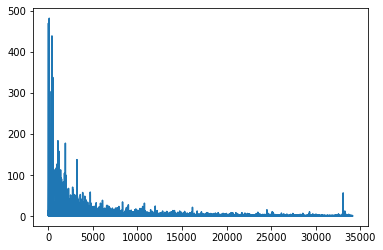

2.212780919452665 - 7.567603421984499
1843


In [122]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    print(str(i) + " - " + sentences[i])
    words = sentences[i].split(" ")
    word_m1 = 'X'
    word_m2 = 'X'
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            word_p1 = 'X'
            word_p2 = 'X'
            if i < len(words) - 1: word_p1 = words[i + 1]
            #if i < len(words) - 2: word_p2 = words[i + 2]
            dimension = word_m2 + "_" + word_m1 + "_XXX_" + word_p1 + "_" + word_p2
            print("    - " + word + ": " + dimension)
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            #word_m2 = word_m1
            word_m1 = word

plt.plot(list(tmp_vector_dimensions.values()))
plt.show()            
            
# keep only frequent dimensions occurences
mean = np.mean(list(tmp_vector_dimensions.values()))
stdev = np.std(list(tmp_vector_dimensions.values()))

print(str(mean) + " - " + str(stdev))

for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 5 and tmp_vector_dimensions[dimension] < 2000:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

In [123]:
# create words vector
words_vector = np.zeros((len(dictionary), len(vector_dimensions)))
words_vector_dict = []

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    word_m1 = 'X'
    word_m2 = 'X'
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            word_p1 = 'X'
            word_p2 = 'X'
            if i < len(words) - 1: word_p1 = words[i + 1]
            #if i < len(words) - 2: word_p2 = words[i + 2]
            dimension = word_m2 + "_" + word_m1 + "_XXX_" + word_p1 + "_" + word_p2
            if dimension in vector_dimensions:
                if word not in words_vector_dict: 
                    words_vector_dict.append(word)
                words_vector[words_vector_dict.index(word), vector_dimensions.index(dimension)] += 1
                #word_m2 = word_m1
                word_m1 = word

# remove all empty rows
words_vector = words_vector[~np.all(words_vector == 0, axis=1)]
                
#normalize
#words_vector = normalize(words_vector, axis=1, norm='l1')
#pca = PCA(n_components = 10)
#words_vector = pca.fit_transform(words_vector)

In [124]:
for i in range(0, len(words_vector_dict)):
    for j in range(0, len(vector_dimensions)):
        x = words_vector[i, j]
        if x > 0:
            print(words_vector_dict[i] + " - " + vector_dimensions[j] + " [" + str(i) + ", " + str(j) + '] = ' + str(x))

ebook - X_X_XXX_of_X [0, 35] = 1.0
ebook - X_do_XXX__X [0, 242] = 1.0
ebook - X_you_XXX_for_X [0, 1288] = 1.0
burgess - X_X_XXX__X [1, 6] = 5.0
you - X_for_XXX__X [2, 4] = 1.0
you - X_X_XXX__X [2, 6] = 3.0
you - X_X_XXX_may_X [2, 10] = 7.0
you - X_of_XXX_are_X [2, 19] = 1.0
you - X_that_XXX_will_X [2, 73] = 1.0
you - X_of_XXX_and_X [2, 75] = 1.0
you - X_X_XXX_and_X [2, 83] = 1.0
you - X_to_XXX__X [2, 85] = 1.0
you - X_tree_XXX__X [2, 130] = 1.0
you - X_with_XXX__X [2, 131] = 1.0
you - X_big_XXX__X [2, 156] = 1.0
you - X_peter_XXX__X [2, 164] = 1.0
you - X_reddy_XXX__X [2, 167] = 1.0
you - X_he_XXX__X [2, 184] = 1.0
you - X_if_XXX_had_X [2, 191] = 4.0
you - X_X_XXX_see_X [2, 204] = 38.0
you - X_it_XXX_X_X [2, 211] = 1.0
you - X_for_XXX_to_X [2, 224] = 2.0
you - X_do_XXX__X [2, 242] = 1.0
you - X_X_XXX_didn_X [2, 265] = 3.0
you - X_X_XXX_are_X [2, 291] = 13.0
you - X_have_XXX__X [2, 310] = 3.0
you - X_when_XXX_can_X [2, 317] = 2.0
you - X_X_XXX_know_X [2, 339] = 9.0
you - X_and_XXX_never

and - X_grass_XXX_moss_X [40, 1383] = 1.0
and - X_X_XXX_as_X [40, 1395] = 1.0
and - X_up_XXX_of_X [40, 1415] = 1.0
and - X_you_XXX_all_X [40, 1463] = 1.0
and - X_is_XXX_is_X [40, 1487] = 1.0
and - X_them_XXX_they_X [40, 1566] = 2.0
and - X_X_XXX_any_X [40, 1613] = 1.0
and - X_X_XXX_so_X [40, 1663] = 1.0
and - X_X_XXX_mrs_X [40, 1682] = 8.0
and - X_X_XXX_if_X [40, 1689] = 1.0
and - X_X_XXX_we_X [40, 1712] = 1.0
and - X_black_XXX_the_X [40, 1716] = 1.0
and - X_think_XXX_will_X [40, 1720] = 1.0
and - X_fact_XXX_he_X [40, 1742] = 1.0
and - X_man_XXX_he_X [40, 1801] = 2.0
go - X_long_XXX__X [41, 87] = 1.0
go - X_and_XXX_to_X [41, 383] = 2.0
go - X_X_XXX_to_X [41, 394] = 2.0
go - X_am_XXX_to_X [41, 582] = 1.0
go - X_X_XXX_on_X [41, 1111] = 3.0
go - X_by_XXX__X [41, 1419] = 1.0
go - X_chuck_XXX__X [41, 1465] = 1.0
school - X_X_XXX__X [42, 6] = 3.0
school - X_X_XXX_is_X [42, 24] = 2.0
school - X_to_XXX_X_X [42, 51] = 1.0
school - X_to_XXX_to_X [42, 77] = 3.0
school - X_to_XXX__X [42, 85] = 3.0

time - X_X_XXX_did_X [108, 1657] = 2.0
time - X_meadow_XXX_X_X [108, 1727] = 1.0
see - X_X_XXX__X [109, 6] = 1.0
see - X_you_XXX__X [109, 205] = 31.0
see - X_t_XXX_any_X [109, 320] = 1.0
see - X_i_XXX__X [109, 633] = 1.0
see - X_to_XXX_what_X [109, 655] = 1.0
see - X_me_XXX__X [109, 749] = 1.0
see - X_up_XXX_X_X [109, 776] = 2.0
see - X_but_XXX_his_X [109, 864] = 1.0
see - X_so_XXX_he_X [109, 1013] = 1.0
see - X_squirrel_XXX__X [109, 1102] = 1.0
see - X_you_XXX_he_X [109, 1171] = 5.0
see - X_t_XXX_that_X [109, 1172] = 1.0
see - X_t_XXX_how_X [109, 1221] = 3.0
see - X_striped_XXX_X_X [109, 1290] = 1.0
see - X_ll_XXX_you_X [109, 1291] = 1.0
see - X_X_XXX_who_X [109, 1342] = 2.0
see - X_will_XXX_that_X [109, 1424] = 1.0
on - X_it_XXX_it_X [110, 11] = 1.0
on - X_it_XXX_the_X [110, 12] = 3.0
on - X_X_XXX_the_X [110, 42] = 6.0
on - X_X_XXX_this_X [110, 47] = 1.0
on - X_peter_XXX_the_X [110, 198] = 1.0
on - X_up_XXX_the_X [110, 245] = 2.0
on - X_color_XXX_his_X [110, 373] = 1.0
on - X_home_XX

me - X_X_XXX_and_X [165, 83] = 1.0
me - X_jack_XXX_X_X [165, 89] = 1.0
me - X_reddy_XXX__X [165, 167] = 1.0
me - X_X_XXX_see_X [165, 204] = 2.0
me - X_eyes_XXX_X_X [165, 275] = 1.0
me - X_have_XXX__X [165, 310] = 1.0
me - X_the_XXX_when_X [165, 316] = 1.0
me - X_X_XXX_to_X [165, 394] = 1.0
me - X_to_XXX_that_X [165, 403] = 1.0
me - X_about_XXX__X [165, 415] = 1.0
me - X_tell_XXX_all_X [165, 417] = 1.0
me - X_be_XXX_X_X [165, 419] = 1.0
me - X_certainly_XXX__X [165, 480] = 1.0
me - X_you_XXX_X_X [165, 725] = 1.0
me - X_X_XXX_a_X [165, 791] = 3.0
me - X_the_XXX_very_X [165, 1334] = 1.0
me - X_X_XXX_always_X [165, 1484] = 1.0
me - X_was_XXX_X_X [165, 1582] = 2.0
me - X_had_XXX_to_X [165, 1619] = 1.0
me - X_X_XXX_so_X [165, 1663] = 1.0
who - X_X_XXX__X [166, 6] = 1.0
who - X_X_XXX_is_X [166, 24] = 4.0
who - X_X_XXX_are_X [166, 291] = 1.0
who - X_you_XXX_have_X [166, 464] = 1.0
who - X_is_XXX_in_X [166, 511] = 1.0
who - X_i_XXX_it_X [166, 627] = 1.0
who - X_he_XXX_it_X [166, 1002] = 1.0
who

because - X_X_XXX_they_X [243, 1198] = 1.0
because - X_that_XXX_you_X [243, 1222] = 1.0
because - X_his_XXX_of_X [243, 1310] = 1.0
my - X_X_XXX__X [244, 6] = 8.0
my - X_make_XXX_home_X [244, 401] = 2.0
my - X_my_XXX__X [244, 558] = 2.0
my - X_X_XXX_coat_X [244, 614] = 1.0
my - X_X_XXX_ears_X [244, 617] = 1.0
my - X_X_XXX_tail_X [244, 622] = 2.0
my - X_X_XXX_home_X [244, 800] = 1.0
my - X_X_XXX_babies_X [244, 802] = 1.0
my - X_X_XXX_how_X [244, 901] = 1.0
my - X_all_XXX_little_X [244, 1510] = 2.0
my - X_X_XXX_way_X [244, 1564] = 1.0
my - X_in_XXX_life_X [244, 1795] = 1.0
brown - X_the_XXX_bat_X [245, 137] = 1.0
brown - X_some_XXX_and_X [245, 152] = 1.0
brown - X_it_XXX__X [245, 196] = 1.0
brown - X_mother_XXX_s_X [245, 437] = 1.0
brown - X_if_XXX_is_X [245, 448] = 1.0
brown - X_other_XXX_X_X [245, 456] = 1.0
brown - X_is_XXX_X_X [245, 544] = 1.0
brown - X_farmer_XXX_s_X [245, 652] = 5.0
brown - X_like_XXX_X_X [245, 679] = 1.0
brown - X_he_XXX_all_X [245, 703] = 1.0
brown - X_is_XXX_and_

hard - X_X_XXX__X [334, 6] = 1.0
hard - X_up_XXX__X [334, 155] = 1.0
hard - X_it_XXX_to_X [334, 299] = 1.0
hard - X_but_XXX__X [334, 461] = 1.0
hard - X_they_XXX_to_X [334, 466] = 1.0
hard - X_his_XXX_and_X [334, 733] = 1.0
hard - X_are_XXX__X [334, 811] = 1.0
hard - X_is_XXX_to_X [334, 882] = 3.0
hard - X_were_XXX_and_X [334, 1624] = 1.0
twinkled - X_and_XXX_X_X [335, 49] = 1.0
twinkled - X_nature_XXX_X_X [335, 493] = 1.0
often - X_X_XXX_has_X [336, 30] = 1.0
often - X_X_XXX_the_X [336, 42] = 1.0
often - X_X_XXX_he_X [336, 236] = 3.0
often - X_X_XXX_are_X [336, 291] = 1.0
often - X_he_XXX_called_X [336, 357] = 1.0
often - X_X_XXX_in_X [336, 670] = 1.0
often - X_it_XXX_hard_X [336, 881] = 1.0
often - X_but_XXX_X_X [336, 1004] = 1.0
often - X_X_XXX_they_X [336, 1198] = 1.0
often - X_i_XXX_seen_X [336, 1237] = 2.0
relatives - X_with_XXX__X [337, 131] = 1.0
relatives - X_have_XXX__X [337, 310] = 1.0
relatives - X_know_XXX__X [337, 508] = 1.0
relatives - X_has_XXX_X_X [337, 673] = 1.0
rela

green - X_the_XXX_meadows_X [454, 230] = 5.0
green - X_the_XXX_forest_X [454, 422] = 9.0
green - X_X_XXX_food_X [454, 1698] = 1.0
forest - X_to_XXX_X_X [455, 51] = 1.0
forest - X_mother_XXX_X_X [455, 82] = 1.0
forest - X_green_XXX_X_X [455, 231] = 1.0
forest - X_for_XXX_and_X [455, 421] = 1.0
forest - X_green_XXX__X [455, 453] = 3.0
forest - X_to_XXX_in_X [455, 790] = 1.0
forest - X_X_XXX_for_X [455, 840] = 1.0
forest - X_green_XXX_and_X [455, 1069] = 4.0
forest - X_think_XXX_is_X [455, 1188] = 1.0
than - X_X_XXX_the_X [456, 42] = 1.0
than - X_the_XXX_a_X [456, 62] = 1.0
than - X_the_XXX_is_X [456, 160] = 1.0
than - X_would_XXX_to_X [456, 227] = 1.0
than - X_was_XXX_a_X [456, 234] = 1.0
than - X_when_XXX_was_X [456, 237] = 1.0
than - X_branch_XXX_the_X [456, 367] = 2.0
than - X_X_XXX_that_X [456, 399] = 1.0
than - X_i_XXX_i_X [456, 442] = 1.0
than - X_i_XXX_you_X [456, 462] = 1.0
than - X_he_XXX_the_X [456, 561] = 1.0
than - X_i_XXX_it_X [456, 627] = 1.0
than - X_they_XXX_a_X [456, 981

sleep - X_chuck_XXX_X_X [557, 1434] = 1.0
comes - X_the_XXX__X [558, 32] = 1.0
comes - X_X_XXX_the_X [558, 42] = 1.0
comes - X_X_XXX_and_X [558, 83] = 1.0
comes - X_that_XXX_in_X [558, 215] = 1.0
comes - X_but_XXX__X [558, 461] = 1.0
comes - X_X_XXX_out_X [558, 995] = 1.0
warm - X_X_XXX_and_X [559, 83] = 1.0
warm - X_for_XXX_X_X [559, 398] = 1.0
fat - X_up_XXX__X [560, 155] = 1.0
many - X_great_XXX_of_X [561, 612] = 1.0
many - X_are_XXX_of_X [561, 620] = 1.0
many - X_i_XXX_of_X [561, 639] = 1.0
many - X_X_XXX_a_X [561, 791] = 1.0
many - X_very_XXX_of_X [561, 1196] = 1.0
many - X_not_XXX__X [561, 1470] = 1.0
many - X_in_XXX_places_X [561, 1534] = 1.0
many - X_but_XXX_of_X [561, 1553] = 1.0
many - X_there_XXX_more_X [561, 1675] = 1.0
once - X_called_XXX_X_X [562, 123] = 1.0
once - X_reddy_XXX__X [562, 167] = 1.0
once - X_X_XXX_it_X [562, 194] = 1.0
once - X_X_XXX_he_X [562, 236] = 1.0
once - X_X_XXX_i_X [562, 331] = 6.0
once - X_X_XXX_in_X [562, 670] = 8.0
once - X_him_XXX_X_X [562, 962]

mouth - X_in_XXX__X [712, 376] = 1.0
pond - X_X_XXX_is_X [713, 24] = 1.0
pond - X_to_XXX_X_X [713, 51] = 1.0
bottom - X_it_XXX_it_X [714, 11] = 1.0
bottom - X_other_XXX_of_X [714, 304] = 1.0
late - X_nature_XXX__X [715, 604] = 1.0
late - X_X_XXX_in_X [715, 670] = 2.0
late - X_but_XXX_X_X [715, 1004] = 1.0
late - X_in_XXX_fall_X [715, 1469] = 1.0
built - X_X_XXX_it_X [716, 194] = 1.0
built - X_he_XXX_for_X [716, 233] = 1.0
built - X_is_XXX__X [716, 319] = 1.0
built - X_tell_XXX_that_X [716, 1506] = 2.0
leaves - X_X_XXX_and_X [717, 83] = 1.0
leaves - X_tree_XXX__X [717, 130] = 1.0
leaves - X_X_XXX_his_X [717, 709] = 1.0
leaves - X_X_XXX_a_X [717, 791] = 1.0
leaves - X_now_XXX__X [717, 1168] = 1.0
leaves - X_over_XXX_X_X [717, 1369] = 1.0
longer - X_X_XXX_and_X [718, 83] = 1.0
longer - X_he_XXX__X [718, 184] = 1.0
longer - X_a_XXX_than_X [718, 1008] = 2.0
mud - X_of_XXX_and_X [719, 75] = 1.0
mud - X_then_XXX__X [719, 1614] = 1.0
houses - X_he_XXX_and_X [720, 243] = 1.0
houses - X_X_XXX_ha

relative - X_little_XXX_of_X [887, 410] = 1.0
relative - X_X_XXX_in_X [887, 670] = 1.0
path - X_little_XXX__X [888, 119] = 2.0
path - X_brown_XXX__X [888, 138] = 1.0
path - X_next_XXX_X_X [888, 847] = 1.0
jimmy - X_X_XXX_is_X [889, 24] = 3.0
jimmy - X_X_XXX_has_X [889, 30] = 1.0
jimmy - X_X_XXX_and_X [889, 83] = 1.0
jimmy - X_peter_XXX__X [889, 164] = 1.0
jimmy - X_that_XXX__X [889, 179] = 1.0
jimmy - X_you_XXX__X [889, 205] = 1.0
jimmy - X_X_XXX_he_X [889, 236] = 1.0
jimmy - X_peter_XXX_X_X [889, 264] = 1.0
jimmy - X_X_XXX_didn_X [889, 265] = 1.0
jimmy - X_X_XXX_never_X [889, 363] = 1.0
jimmy - X_X_XXX_looked_X [889, 469] = 1.0
jimmy - X_know_XXX__X [889, 508] = 1.0
jimmy - X_way_XXX__X [889, 552] = 1.0
jimmy - X_hasn_XXX_any_X [889, 1360] = 1.0
jimmy - X_buster_XXX_X_X [889, 1791] = 1.0
weasel - X_the_XXX__X [890, 32] = 1.0
weasel - X_the_XXX_X_X [890, 111] = 1.0
weasel - X_of_XXX_family_X [890, 321] = 1.0
weasel - X_is_XXX_X_X [890, 544] = 1.0
weasel - X_s_XXX__X [890, 814] = 1.0
we

bighorn - X_X_XXX__X [1074, 6] = 1.0
bighorn - X_X_XXX_is_X [1074, 24] = 1.0
bighorn - X_X_XXX_and_X [1074, 83] = 1.0
bighorn - X_X_XXX_s_X [1074, 124] = 1.0
bighorn - X_X_XXX_does_X [1074, 676] = 1.0
bighorn - X_X_XXX_doesn_X [1074, 872] = 1.0
bighorn - X_them_XXX_the_X [1074, 1180] = 1.0
weight - X_X_XXX_he_X [1075, 236] = 1.0
low - X_that_XXX_X_X [1076, 199] = 1.0
slim - X_short_XXX__X [1077, 662] = 1.0
patch - X_all_XXX_of_X [1078, 1150] = 1.0
patch - X_then_XXX__X [1078, 1614] = 1.0
having - X_X_XXX_a_X [1079, 791] = 1.0
barnyard - X_brown_XXX__X [1080, 138] = 1.0
pig - X_a_XXX_and_X [1081, 112] = 1.0
nuts - X_he_XXX__X [1082, 184] = 1.0
peccary - X_X_XXX_have_X [1083, 386] = 1.0
hardshell - X_it_XXX_the_X [1084, 12] = 1.0
hardshell - X_X_XXX_the_X [1084, 42] = 2.0
hardshell - X_X_XXX_s_X [1084, 124] = 1.0
hardshell - X_but_XXX__X [1084, 461] = 1.0
shell - X_X_XXX_is_X [1085, 24] = 1.0
shell - X_X_XXX_of_X [1085, 35] = 1.0
shell - X_is_XXX__X [1085, 319] = 1.0
armadillo - X_X_XXX_

In [125]:
# create Neral Network model with 1 hidden layer (will be the weights of word embenddings)
model = models.Sequential()
model.add(layers.Dense(words_vector.shape[1], activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(words_vector.shape[0], activation='softmax'))
model.compile(optimizer=optimizers.Adam(0.01), loss='MSE', metrics=['accuracy'])

In [126]:
# train neural network
# input = words_vector
# output = dictionary
# xxx = middle layer
model.fit(words_vector, np.identity(words_vector.shape[0]), epochs=20, batch_size=32)

Train on 1129 samples
Epoch 1/20
1129/1129 [==============================] - 1s 1ms/sample - loss: 8.8496e-04 - accuracy: 8.8574e-04
Epoch 2/20
1129/1129 [==============================] - 1s 460us/sample - loss: 8.8495e-04 - accuracy: 8.8574e-04
Epoch 3/20
1129/1129 [==============================] - 0s 424us/sample - loss: 8.8494e-04 - accuracy: 8.8574e-04
Epoch 4/20
1129/1129 [==============================] - 0s 427us/sample - loss: 8.8488e-04 - accuracy: 0.0027
Epoch 5/20
1129/1129 [==============================] - 0s 420us/sample - loss: 8.8549e-04 - accuracy: 0.0027
Epoch 6/20
1129/1129 [==============================] - 0s 426us/sample - loss: 8.8417e-04 - accuracy: 0.0027
Epoch 7/20
1129/1129 [==============================] - 0s 428us/sample - loss: 8.8358e-04 - accuracy: 0.0027
Epoch 8/20
1129/1129 [==============================] - 0s 429us/sample - loss: 8.8391e-04 - accuracy: 0.0027
Epoch 9/20
1129/1129 [==============================] - 1s 460us/sample - loss: 8.8500e-

In [127]:
# get middle layer weights
ml_weights = np.array(list(model.layers[2].get_weights()[0])).transpose()
print(ml_weights.shape)

(1129, 10)


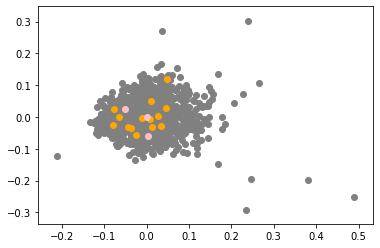

In [128]:
# redude dimensions to 2D (for display)
pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(ml_weights)

#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1], c="grey")

# animals group 1 - orange
data_sample = np.zeros((14, 2))
data_sample[0] = vector_2D[words_vector_dict.index("rat")]
data_sample[1] = vector_2D[words_vector_dict.index("rabbit")]
data_sample[2] = vector_2D[words_vector_dict.index("mouse")]
data_sample[3] = vector_2D[words_vector_dict.index("wolf")]
data_sample[4] = vector_2D[words_vector_dict.index("bat")]
data_sample[5] = vector_2D[words_vector_dict.index("deer")]
data_sample[6] = vector_2D[words_vector_dict.index("fox")]
data_sample[7] = vector_2D[words_vector_dict.index("cat")]
data_sample[8] = vector_2D[words_vector_dict.index("dog")]
data_sample[9] = vector_2D[words_vector_dict.index("birds")]
data_sample[10] = vector_2D[words_vector_dict.index("fish")]
data_sample[11] = vector_2D[words_vector_dict.index("seal")]
data_sample[12] = vector_2D[words_vector_dict.index("chipmunk")]
data_sample[13] = vector_2D[words_vector_dict.index("squirrel")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="orange")

# animals group 2 - pink
data_sample = np.zeros((3, 2))
#data_sample[0] = vector_2D[words_vector_dict.index("coyote")]
data_sample[1] = vector_2D[words_vector_dict.index("beaver")]
data_sample[2] = vector_2D[words_vector_dict.index("bighorn")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="pink")

plt.show()

In [129]:
# compute distance matric
dist_matrix = sklearn.metrics.pairwise.euclidean_distances(ml_weights)

In [130]:
xxx = np.argmin(np.where(dist_matrix == 0, 9999, dist_matrix), axis=1)
i = 0;
for x in xxx:
    w1 = dictionary[i]
    w2 = dictionary[x]
    dist = dist_matrix[dictionary.index(w1), dictionary.index(w2)]
    if dist < 10.0:
        print(w1 + " - " + w2 + " - " + str(dist))
    i += 1

project - garden - 0.053767655
gutenberg - northwest - 0.09130458
ebook - hadn - 0.064909935
of - no - 0.0808111
the - groups - 0.07893996
burgess - kills - 0.06455504
animal - traveler - 0.081808776
book - wasn - 0.13752423
for - heedless - 0.09374317
children - smiled - 0.087375
by - hair - 0.07401496
w - three - 0.07637676
this - wake - 0.07473787
is - low - 0.08179963
use - larger - 0.09921723
anyone - ox - 0.093101226
anywhere - otter - 0.08668731
at - they - 0.07239499
no - been - 0.07108118
and - little - 0.075987056
with - plants - 0.053682245
almost - set - 0.52658385
you - yap - 0.061961148
may - swamps - 0.072890714
copy - chance - 0.0728163
it - set - 0.2736874
give - one - 0.056438666
away - hundreds - 0.08681561
or - be - 0.0765902
re - has - 0.067121685
under - watching - 0.04419167
terms - mischief - 0.086305454
license - meadow - 0.077885784
www - surprised - 0.07597712
last - taken - 0.078946
set - protect - 0.22390462
start - cannot - 0.097071454
to - pay - 0.1051246

grubs - running - 0.08956865
fat - carries - 0.057362497
meat - runner - 0.069395974
comfortable - birds - 0.09290078
fear - grass - 0.075340085
hooty - large - 0.052694473
owl - chief - 0.06165781
living - both - 0.06444707
message - late - 0.09361
perfectly - save - 0.08800286
satisfied - there - 0.062017094
rule - tips - 0.07109468
plenty - owl - 0.06539937
understand - flat - 0.08208147
interested - plain - 0.08087102
learning - afraid - 0.0871161
however - end - 0.06952202
sent - covered - 0.076691695
shape - found - 0.07844129
wherever - bank - 0.10933543
including - united - 0.07394517
claws - hear - 0.076083936
climbed - did - 0.062603526
real - sorry - 0.0727114
climber - hides - 0.08184891
digging - dare - 0.076430805
grew - farther - 0.07446369
surface - water - 0.078650564
doorways - cannot - 0.07389284
hanging - simply - 0.08164703
easy - mouse - 0.094841264
pushed - dry - 0.09077612
change - named - 0.087139264
underground - peter - 0.082857385
food - particular - 0.07926

In [110]:
dist_matrix[dictionary.index("rat"), dictionary.index("cat")]

0.14138204

In [107]:
print(vector_2D[dictionary.index("rat")])
print(vector_2D[dictionary.index("cat")])

[0.0099423  0.04077495]
[0.07200322 0.01382435]
